In [1]:
# package(s) related to time, space and id
import datetime, time
import os
import io
import functools
import logging
import pickle
import random
import math

# package(s) related to the simulation
import simpy
import scipy as sc
import math
import networkx as nx  
import numpy as np
import pandas as pd
import re
import yaml as yaml
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

# OpenTNSim
from opentnsim import core
from opentnsim import plot
from opentnsim import model

# spatial libraries 
import shapely.geometry
import shapely.wkt
import pyproj
import shapely.geometry
import folium
import datetime

# package(s) for data handling
import requests

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

# define the coorinate system
geod = pyproj.Geod(ellps="WGS84")

location_vessel_database = "Vessels/richtlijnen-vaarwegen-2017.csv"

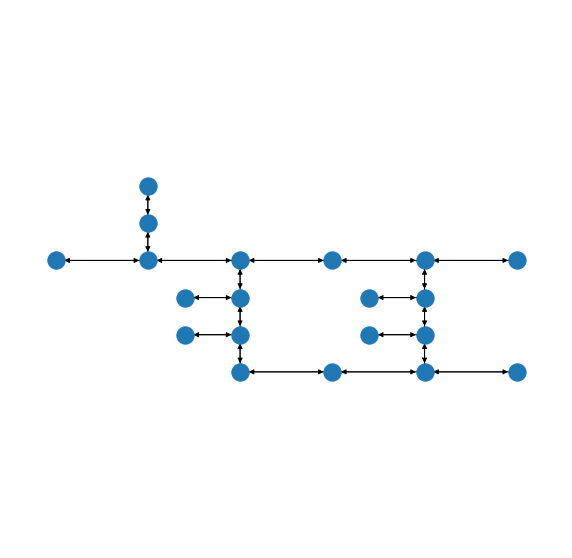

In [2]:
Node = type('Site', (core.Identifiable, core.Log, core.Locatable, core.HasResource), {})
nodes = []
path = []

coords = []
coords.append([0.00,0.00])

for i in range(4):
    coords.append([geod.fwd(coords[i][0],coords[i][1],90,5000)[0],geod.fwd(coords[i][0],coords[i][1],90,5000)[1]])
    
coords.append([geod.fwd(coords[2][0],coords[2][1],180,2000)[0],geod.fwd(coords[2][0],coords[2][1],180,2000)[1]]) #5
coords.append([geod.fwd(coords[5][0],coords[5][1],180,2000)[0],geod.fwd(coords[5][0],coords[5][1],180,2000)[1]]) #6

coords.append([geod.fwd(coords[4][0],coords[4][1],180,2000)[0],geod.fwd(coords[4][0],coords[4][1],180,2000)[1]]) #7
coords.append([geod.fwd(coords[7][0],coords[7][1],180,2000)[0],geod.fwd(coords[7][0],coords[7][1],180,2000)[1]]) #8

coords.append([geod.fwd(coords[5][0],coords[5][1],270,3000)[0],geod.fwd(coords[5][0],coords[5][1],270,3000)[1]]) #9
coords.append([geod.fwd(coords[6][0],coords[6][1],270,3000)[0],geod.fwd(coords[6][0],coords[6][1],270,3000)[1]]) #10

coords.append([geod.fwd(coords[7][0],coords[7][1],270,3000)[0],geod.fwd(coords[7][0],coords[7][1],270,3000)[1]]) #11
coords.append([geod.fwd(coords[8][0],coords[8][1],270,3000)[0],geod.fwd(coords[8][0],coords[8][1],270,3000)[1]]) #12

coords.append([geod.fwd(coords[6][0],coords[6][1],180,2000)[0],geod.fwd(coords[6][0],coords[6][1],180,2000)[1]]) #13
coords.append([geod.fwd(coords[8][0],coords[8][1],180,2000)[0],geod.fwd(coords[8][0],coords[8][1],180,2000)[1]]) #14
coords.append([geod.fwd(coords[13][0],coords[13][1],90,5000)[0],geod.fwd(coords[13][0],coords[13][1],90,5000)[1]]) #15
coords.append([geod.fwd(coords[14][0],coords[14][1],90,5000)[0],geod.fwd(coords[14][0],coords[14][1],90,5000)[1]]) #16
coords.append([geod.fwd(coords[4][0],coords[4][1],90,5000)[0],geod.fwd(coords[4][0],coords[4][1],90,5000)[1]]) #17

coords.append([geod.fwd(coords[1][0],coords[1][1],0,2000)[0],geod.fwd(coords[1][0],coords[1][1],0,2000)[1]]) #18
coords.append([geod.fwd(coords[18][0],coords[18][1],0,2000)[0],geod.fwd(coords[18][0],coords[18][1],0,2000)[1]]) #19

for d in range(len(coords)):
    data_node = {"env": [],
                 "name": "Node " + str(d+1),
                 "geometry": shapely.geometry.Point(coords[d][0], coords[d][1])}
    node = Node(**data_node)
    nodes.append(node)

for i in range(4):
    path.append([nodes[i],nodes[i+1]]) 
    path.append([nodes[i+1],nodes[i]])

path.append([nodes[2],nodes[5]])     
path.append([nodes[5],nodes[2]]) 
path.append([nodes[5],nodes[6]])     
path.append([nodes[6],nodes[5]]) 
path.append([nodes[4],nodes[7]])     
path.append([nodes[7],nodes[4]]) 
path.append([nodes[7],nodes[8]])     
path.append([nodes[8],nodes[7]]) 
path.append([nodes[5],nodes[9]])     
path.append([nodes[9],nodes[5]]) 
path.append([nodes[6],nodes[10]])     
path.append([nodes[10],nodes[6]]) 
path.append([nodes[7],nodes[11]])     
path.append([nodes[11],nodes[7]]) 
path.append([nodes[8],nodes[12]])     
path.append([nodes[12],nodes[8]]) 
path.append([nodes[6],nodes[13]])     
path.append([nodes[13],nodes[6]]) 
path.append([nodes[8],nodes[14]])     
path.append([nodes[14],nodes[8]]) 
path.append([nodes[14],nodes[15]])     
path.append([nodes[15],nodes[14]]) 
path.append([nodes[13],nodes[15]])     
path.append([nodes[15],nodes[13]]) 
path.append([nodes[14],nodes[16]])     
path.append([nodes[16],nodes[14]]) 
path.append([nodes[4],nodes[17]])     
path.append([nodes[17],nodes[4]]) 
path.append([nodes[17],nodes[4]]) 
path.append([nodes[17],nodes[4]]) 
path.append([nodes[1],nodes[18]]) 
path.append([nodes[18],nodes[1]]) 
path.append([nodes[18],nodes[19]]) 
path.append([nodes[19],nodes[18]])

FG = nx.DiGraph()

positions = {}
for node in nodes:
    positions[node.name] = (node.geometry.x, node.geometry.y)
    FG.add_node(node.name, geometry = node.geometry)

for edge in path:
    FG.add_edge(edge[0].name, edge[1].name, weight = 1)

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(FG, positions)
plt.axis('equal')
plt.show()

In [3]:
simulation_start = datetime.datetime.now()
sim = model.Simulation(simulation_start,FG)
env = sim.environment
duration = 400000

In [4]:
env.FG = FG

#vessel_generator_1 = core.VesselGenerators.sea_going_vessels_generator()


#vessel_generator_2 = core.VesselGenerators.barges_generator()


#vessel_generator_3 = core.VesselGenerators.barges_generator()


turning_basin_1 = core.IsTurningBasin(env = env, name = 'Turning Basin 1', node = 'Node 6')
turning_basin_2 = core.IsTurningBasin(env = env, name = 'Turning Basin 2', node = 'Node 7')
turning_basin_3 = core.IsTurningBasin(env = env, name = 'Turning Basin 3', node = 'Node 8')
turning_basin_4 = core.IsTurningBasin(env = env, name = 'Turning Basin 4', node = 'Node 9')

origin_1 = core.IsOrigin(env = env, name = 'Origin 1')

anchorage_1 = core.IsAnchorage(env = env, name = 'Anchorage 1', node = 'Node 19', typ = 'sea_going_vessels',max_capacity = 25)
anchorage_2 = core.IsAnchorage(env = env, name = 'Anchorage 2', node = 'Node 20', typ = 'sea_going_vessels',max_capacity = 25)

terminal_1 = core.IsTerminal(env = env, name = 'Container Terminal 1',length = 1200, node_start = 'Node 6', node_end = 'Node 10', typ = 'quay')
terminal_2 = core.IsTerminal(env = env, name = 'Container Terminal 2',length = 1200, node_start = 'Node 7', node_end = 'Node 11', typ = 'quay')
terminal_3 = core.IsTerminal(env = env, name = 'Container Terminal 3',length = 1200, node_start = 'Node 8', node_end = 'Node 12', typ = 'quay')
terminal_4 = core.IsTerminal(env = env, name = 'Container Terminal 4',length = 1200, jetty_locations = [150,450,750,1050], node_start = 'Node 9', node_end = 'Node 13', typ = 'jetty')

In [5]:
FG.nodes["Node 1"]["Origin"] = [origin_1]

FG.nodes["Node 19"]["Anchorage"] = [anchorage_1]

FG.nodes["Node 20"]["Anchorage"] = [anchorage_2]

FG.nodes["Node 6"]["Turning Basin"] = [turning_basin_1]

FG.nodes["Node 7"]["Turning Basin"] = [turning_basin_2]

FG.nodes["Node 8"]["Turning Basin"] = [turning_basin_3]

FG.nodes["Node 9"]["Turning Basin"] = [turning_basin_4]

FG.nodes["Node 1"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 1"]["Junction"].name = ['waterway_access']
FG.nodes["Node 1"]["Junction"].type = ['two-way_traffic']
FG.nodes["Node 19"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 19"]["Junction"].name = ['anchorage_access','anchorage_access']
FG.nodes["Node 19"]["Junction"].type = ['two-way_traffic','two-way_traffic']
FG.nodes["Node 20"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 20"]["Junction"].name = ['anchorage_access','anchorage_access']
FG.nodes["Node 20"]["Junction"].type = ['two-way_traffic','two-way_traffic']
FG.nodes["Node 18"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 18"]["Junction"].name = ['waterway_access']
FG.nodes["Node 18"]["Junction"].type = ['two-way_traffic']
FG.nodes["Node 17"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 17"]["Junction"].name = ['waterway_access']
FG.nodes["Node 17"]["Junction"].type = ['two-way_traffic']
FG.nodes["Node 10"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 10"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 10"]["Junction"].type = ['one-way_traffic']
FG.nodes["Node 11"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 11"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 11"]["Junction"].type = ['one-way_traffic']
FG.nodes["Node 12"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 12"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 12"]["Junction"].type = ['one-way_traffic']
FG.nodes["Node 13"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 13"]["Junction"].name = ['harbour_basin_access']
FG.nodes["Node 13"]["Junction"].type = ['one-way_traffic']

FG.nodes["Node 2"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 2"]["Junction"].name = ['waterway_access','waterway_access','anchorage_access']
FG.nodes["Node 2"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']
FG.nodes["Node 6"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 6"]["Junction"].name = ['waterway_access','waterway_access','harbour_basin_access']
FG.nodes["Node 6"]["Junction"].type = ['two-way_traffic','two-way_traffic','one-way_traffic']
FG.nodes["Node 7"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 7"]["Junction"].name = ['waterway_access','harbour_basin_access','waterway_access']
FG.nodes["Node 7"]["Junction"].type = ['two-way_traffic','one-way_traffic','two-way_traffic']
FG.nodes["Node 8"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 8"]["Junction"].name = ['waterway_access','waterway_access','harbour_basin_access']
FG.nodes["Node 8"]["Junction"].type = ['two-way_traffic','two-way_traffic','one-way_traffic']
FG.nodes["Node 9"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 9"]["Junction"].name = ['waterway_access','harbour_basin_access','waterway_access']
FG.nodes["Node 9"]["Junction"].type = ['two-way_traffic','one-way_traffic','two-way_traffic']
FG.nodes["Node 3"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 3"]["Junction"].name = ['waterway_access','waterway_access','waterway_access']
FG.nodes["Node 3"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']
FG.nodes["Node 5"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 5"]["Junction"].name = ['waterway_access','waterway_access','waterway_access']
FG.nodes["Node 5"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']
FG.nodes["Node 15"]["Junction"] = core.IsJunction(env = [], name = [], sections = [], typ = [])
FG.nodes["Node 15"]["Junction"].name = ['waterway_access','waterway_access','waterway_access']
FG.nodes["Node 15"]["Junction"].type = ['two-way_traffic','two-way_traffic','two-way_traffic']

junction_nodes = []
for node in list(FG.nodes):
    if 'Junction' in FG.nodes[node]:
        junction_nodes.append(node)
        
for node1 in junction_nodes:
    names = []
    sections = []
    types = []
    for node2 in junction_nodes:
        if node1 == node2:
            continue
            
        route = nx.dijkstra_path(FG, node1, node2)
        section = True
        for node in route[1:-1]:
            if 'Junction' in FG.nodes[node]:
                section = False
                break

        if section:
            sections.append([node1,node2])
            names.append(FG.nodes[node1]["Junction"].name[len(sections)-1])
            types.append(FG.nodes[node1]["Junction"].type[len(sections)-1])
    
    FG.nodes[node1]["Junction"] = [core.IsJunction(env = env, name = names, sections = sections, typ = types)]
            
FG.edges['Node 6','Node 10']["Terminal"] = [terminal_1]
FG.edges['Node 7','Node 11']["Terminal"] = [terminal_2]
FG.edges['Node 8','Node 12']["Terminal"] = [terminal_3]
FG.edges['Node 9','Node 13']["Terminal"] = [terminal_4]

for edge in enumerate(FG.edges):
    if 'Terminal' in FG.edges[edge[1]]:
        FG.edges[edge[1][1],edge[1][0]]['Terminal'] = FG.edges[edge[1]]['Terminal']

In [6]:
df = pd.DataFrame()
df[0] = ['Container Vessel','Dry Bulk Vessel','Tanker']
df[1] = [300,300,300] #[366,427,330]
df[2] = [49,55,55]
df[3] = [28,28,28]
df[4] = 0.5*df[3]
df[5] = [66,66,66]
df[6] = df[5]-(df[3]-df[4])
df[7] = [120,120,120]
df[8] = [36*60,72*60,40*60]
df.columns = ['type','L','B','T_f','T_e','H_e','H_f','t_b','t_l']
df

,type,L,B,T_f,T_e,H_e,H_f,t_b,t_l
0,Container Vessel,300,49,28,14.0,66,52.0,120,2160
1,Dry Bulk Vessel,300,55,28,14.0,66,52.0,120,4320
2,Tanker,300,55,28,14.0,66,52.0,120,2400


In [7]:
vessel_db = pd.read_csv(location_vessel_database)
vessel_db.columns = ['vessel_id','type','B','L','H_e','H_f','T_e','T_f','C','P']
vessel_db['t_b'] = 10
vessel_db['t_l'] = [vessel_db['C'][0]/vessel_db['C'][5]*360,vessel_db['C'][1]/vessel_db['C'][5]*360,vessel_db['C'][2]/vessel_db['C'][5]*360,vessel_db['C'][3]/vessel_db['C'][5]*360,vessel_db['C'][4]/vessel_db['C'][5]*360,360]
vessel_db

,vessel_id,type,B,L,H_e,H_f,T_e,T_f,C,P,t_b,t_l
0,12ad8a02-4aef-11e9-9940-b469212bff5b,CEMT - I,5.05,38.5,4.65,3.35,1.2,2.5,365,175,10,21.9
1,17746aee-4aef-11e9-8ebf-b469212bff5b,CEMT - II,6.60,55.0,5.80,4.60,1.4,2.6,615,250,10,36.9
2,1be5fb2e-4aef-11e9-9bfb-b469212bff5b,CEMT - III,8.20,85.0,6.30,5.10,1.5,2.7,1250,435,10,75.0
3,208a5aca-4aef-11e9-b7e9-b469212bff5b,CEMT - IV,9.50,105.0,6.70,5.30,1.6,3.0,2040,690,10,122.4
4,24f93100-4aef-11e9-8ff9-b469212bff5b,CEMT - Va,11.40,135.0,7.10,5.40,1.8,3.5,3735,1425,10,224.1
5,289b8492-4aef-11e9-b34f-b469212bff5b,CEMT - VIa,17.00,135.0,10.00,8.00,2.0,4.0,6000,2015,10,360.0


In [8]:
Vessel = type('Vessel', 
              (core.Identifiable, core.Movable, core.Routeable, core.VesselProperties, core.ExtraMetadata), {})

generator_sea = model.VesselGenerator(Vessel,df)
generator_inland = model.VesselGenerator(Vessel,vessel_db)

In [9]:
origin = 'Node 1'
destination = 'Node 11'
sim.add_vessels(vessel_generator = generator_sea, simulation_start = simulation_start, origin = origin, destination = destination, arrival_distribution = (3600/5000), arrival_process = 'Uniform')

#origin = 'Node 17'
#destination = 'Node 11'
#sim.add_vessels(vessel_generator = generator_inland, simulation_start = simulation_start, origin = origin, destination = destination, arrival_distribution = (3600/10000), arrival_process = 'Uniform')

#origin = 'Node 18'
#destination = 'Node 11'
#sim.add_vessels(vessel_generator = generator_inland, simulation_start = simulation_start, origin = origin, destination = destination, arrival_distribution = (3600/10000), arrival_process = 'Uniform')

In [10]:
depth = [[],[]]
width = [[],[]]
water_level = [[],[]]
current_velocity = [[],[]]
current_direction = [[],[]]
time = np.arange(0,duration,60)
phase_lag_water_level = [0,300,600,950,1300,725,850,1440,1580,725,850,1440,1580,1090,1830,1460,2430,3030,300,300]
phase_lag_current_velocity = [x-12.5*60*60/4 for x in phase_lag_water_level]
depth[1] = [32,32,28,20,20,28,28,20,20,32,32,24,24,7,7,7,7,7,32,32]
width[1] = [100,100,100,100,100,500,500,500,500,500,500,500,500,50,50,50,50,100,100,100]
vmag = [0.01,0.01,1.0,1.0,1.0,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.75,1.0,0.01,0.01]
vdir_flood = [90,90,90,90,90,180,180,180,180,270,270,270,270,90,90,90,90,90,90,90]
for nodes in enumerate(FG.nodes):
    depth[0].append(FG.nodes[nodes[1]]['geometry'])
    width[0].append(FG.nodes[nodes[1]]['geometry'])
    water_level[0].append((FG.nodes[nodes[1]]['geometry']))
    water_level[1].append([[],[]])
    current_velocity[0].append((FG.nodes[nodes[1]]['geometry']))
    current_velocity[1].append([[],[]])
    current_direction[0].append((FG.nodes[nodes[1]]['geometry']))
    current_direction[1].append([[],[]])
    for t in range(len(time)):
        water_level[1][nodes[0]][0].append(time[t]+simulation_start.timestamp())
        water_level[1][nodes[0]][1].append(2.5*np.sin(2*math.pi*(time[t]+simulation_start.timestamp())/(45000)-2*phase_lag_water_level[nodes[0]]/45000*math.pi))
    for t in range(len(time)):
        current_velocity[1][nodes[0]][0].append(time[t]+simulation_start.timestamp())
        current_velocity[1][nodes[0]][1].append(vmag[nodes[0]]*np.sin(2*math.pi*(time[t]+simulation_start.timestamp())/(45000)-2*phase_lag_current_velocity[nodes[0]]/45000*math.pi))
    
    current_direction_time = []
    current_direction_magnitude = []
    current_direction_time.append(simulation_start.timestamp())
    vdir_ebb = vdir_flood[nodes[0]]+180
    if vdir_ebb >= 360:
        vdir_ebb = vdir_ebb-360
    if current_velocity[1][nodes[0]][1][0] >= 0:
        current_direction_magnitude.append(vdir_flood[nodes[0]])
    else:
        current_direction_magnitude.append(vdir_ebb)

    for t in range(len(current_velocity[1][nodes[0]][1])):
        if t == 0:
            continue
        if (current_velocity[1][nodes[0]][1][t-1] < 0 and current_velocity[1][nodes[0]][1][t] >= 0) or (current_velocity[1][nodes[0]][1][t-1] >= 0 and current_velocity[1][nodes[0]][1][t] < 0):
            current_direction_time.append(current_velocity[1][nodes[0]][0][t])
            current_direction_time.append(current_velocity[1][nodes[0]][0][t]+1)
            
            if current_velocity[1][nodes[0]][1][t] >= 0:
                current_direction_magnitude.append(vdir_ebb)
                current_direction_magnitude.append(vdir_flood[nodes[0]])
            else:
                current_direction_magnitude.append(vdir_flood[nodes[0]])
                current_direction_magnitude.append(vdir_ebb)

    current_direction_time.append(simulation_start.timestamp()+duration)
    if current_velocity[1][nodes[0]][1][-1] >= 0:
        current_direction_magnitude.append(vdir_flood[nodes[0]])
    else:
        current_direction_magnitude.append(vdir_ebb)

    current_direction[1][nodes[0]][0] = current_direction_time
    current_direction[1][nodes[0]][1] = current_direction_magnitude
    
core.NetworkProperties.append_data_to_nodes(FG,width,depth,water_level,current_velocity,current_direction)
core.NetworkProperties.append_info_to_edges(FG)

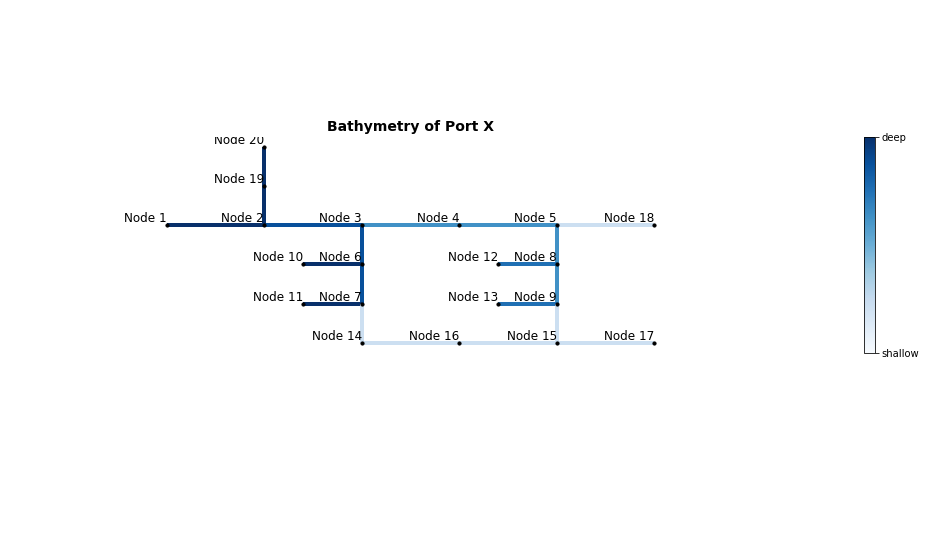

In [11]:
edge_count = []
for edge in enumerate(FG.edges):
    edge_count.append(FG.edges[edge[1]]['Info']['Depth'][0])

colormap = cm.get_cmap('Blues', 256)
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax = fig.add_axes([0, 0.4, 1, 0.3]);
nx.draw(FG, positions, node_size = 10, node_color ='k', with_labels = True, horizontalalignment = 'right', verticalalignment = 'bottom', edge_color = edge_count, edge_cmap = colormap, edge_vmin = 0, arrows = False, width= 4)
plt.axis('equal')
cbar = fig.colorbar(cm.ScalarMappable(cmap=colormap), ax=ax, ticks=[0, 1])
cbar.ax.set_yticklabels(['shallow','deep'])  # vertically oriented colorbar
plt.title('Bathymetry of Port X',fontsize = 14, fontweight='bold')
plt.show()

In [12]:
sim.run(duration = duration)

In [13]:
vessels = sim.environment.vessels
env = sim.environment

In [14]:
df = pd.DataFrame.from_dict(vessels[0].log)
df

,Message,Timestamp,Value,Geometry
0,Sailing from node Node 1 to node Node 2 start,2021-09-02 18:33:57.000000,0.000000,POINT (0 0)
1,Sailing from node Node 1 to node Node 2 stop,2021-09-02 18:54:47.000000,0.000000,POINT (0.04491576420597607 0)
2,Sailing from node Node 2 to node Node 19 start,2021-09-02 18:54:47.000000,0.000000,POINT (0.04491576420597607 0)
3,Sailing from node Node 2 to node Node 19 stop,2021-09-02 19:03:07.000000,0.000000,POINT (0.04491576420597607 0.01808738953497423)
4,Waiting in anchorage start,2021-09-02 19:03:07.000000,0.000000,POINT (0.04491576420597607 0.01808738953497423)
5,Waiting in anchorage stop,2021-09-03 00:21:32.119887,19105.119887,POINT (0.04491576420597607 0.01808738953497423)
6,Sailing from node Node 19 to node Node 2 start,2021-09-03 00:40:17.119879,0.000000,POINT (0.04491576420597607 0.01808738953497423)
7,Sailing from node Node 19 to node Node 2 stop,2021-09-03 00:48:37.119879,0.000000,POINT (0.04491576420597607 0)
8,Sailing from node Node 2 to node Node 3 start,2021-09-03 00:48:37.119879,0.000000,POINT (0.04491576420597607 0)
9,Sailing from node Node 2 to node Node 3 stop,2021-09-03 01:09:27.119879,0.000000,POINT (0.08983152841195215 0)


In [15]:
def calculate_distance(orig, dest):
    wgs84 = pyproj.Geod(ellps='WGS84')
    
    distance = wgs84.inv(orig[0], orig[1], 
                         dest[0], dest[1])[2]
    
    return distance

vessel_path_x = []
vessel_path_t = []

list_of_nodes = list(vessels[0].env.FG.nodes)

for node in list_of_nodes:
    if 'Origin' in vessels[0].env.FG.nodes[node].keys():
        origin = node
        
    if 'Anchorage' in vessels[0].env.FG.nodes[node].keys():
        list_of_nodes.remove(node)

    if 'Junction' in vessels[0].env.FG.nodes[node].keys() and vessels[0].env.FG.nodes[node]['Junction'][0].name == ['waterway_access','waterway_access','anchorage_access']:
        virtual_anchorage = node
        
for v in range(0,len(vessels)):
    vessel_path_xt = []
    vessel_path_tt = []
    distance = 0
    direction = 0
    vessel_path_t0 = simulation_start.timestamp()
    vessel_path_xt.append(distance)
    vessel_path_tt.append(vessels[v].log["Timestamp"][0].timestamp()-vessel_path_t0)
    for t in range(1,len(vessels[v].log["Message"])):  
        if 'Deberthing stop' in vessels[v].log["Message"][t]:
            direction = 1
        for node1 in list_of_nodes: 
            for node2 in list_of_nodes:
                if (vessels[v].log["Message"][t] == 'Sailing from node ' + node1 + ' to node ' + node2 + ' start' or 
                    vessels[v].log["Message"][t] == 'Sailing from node ' + node1 + ' to node ' + node2 + ' stop'):
                    if node1 == origin and node2 == virtual_anchorage:
                        distance_to_anchorage = calculate_distance((vessels[v].env.FG.nodes[node1]['geometry'].x,vessels[v].env.FG.nodes[node1]['geometry'].y),(vessels[v].env.FG.nodes[node2]['geometry'].x,vessels[v].env.FG.nodes[node2]['geometry'].y))
                    
                    if direction == 0:
                        distance += calculate_distance((vessels[v].log["Geometry"][t-1].x,vessels[v].log['Geometry'][t-1].y),(vessels[v].log["Geometry"][t].x,vessels[v].log['Geometry'][t].y))
                    elif direction == 1:
                        distance -= calculate_distance((vessels[v].log["Geometry"][t-1].x,vessels[v].log['Geometry'][t-1].y),(vessels[v].log["Geometry"][t].x,vessels[v].log['Geometry'][t].y))
                    vessel_path_xt.append(distance)
                    vessel_path_tt.append(vessels[v].log["Timestamp"][t].timestamp()-vessel_path_t0)
                    break
                    
    vessel_path_x.append(vessel_path_xt)
    vessel_path_t.append(vessel_path_tt)

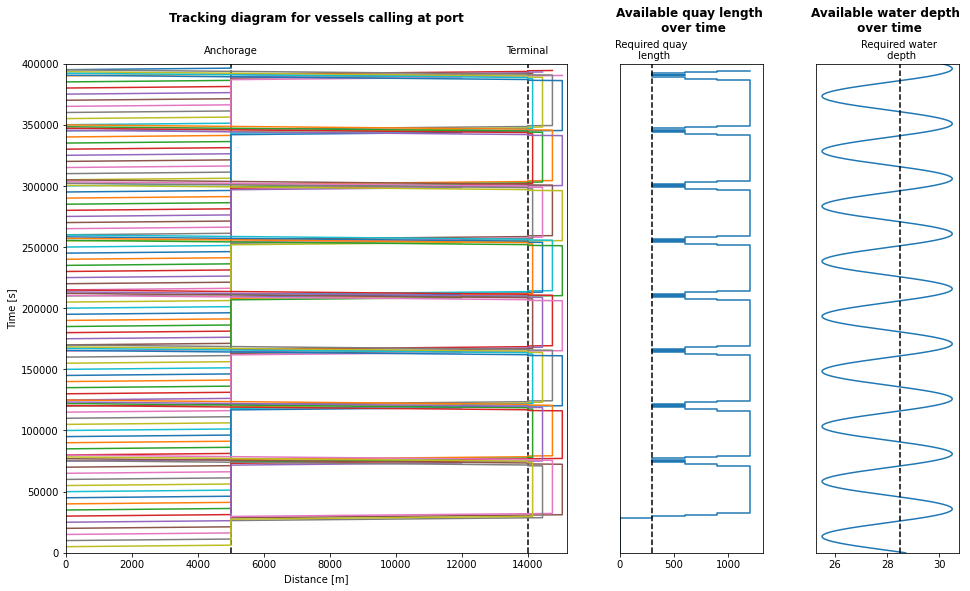

In [16]:
terminal = vessels[0].env.FG.edges['Node 7','Node 11']['Terminal'][0]
if terminal.type == 'quay':
    time_available_quay_length = []
    available_quay_length = []
    quay_level = 0
    time_available_quay_length.append(0)
    available_quay_length.append(quay_level)
    for t in range(len(terminal.log["Message"])):
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(quay_level)
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(terminal.log["Value"][t])
        quay_level = terminal.log["Value"][t]
if terminal.type == 'jetty':
    time_available_quay_length = []
    available_quay_length = []
    quay_level = 0
    time_available_quay_length.append(0)
    available_quay_length.append(quay_level)
    for t in range(len(terminal.log["Message"])):
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(quay_level)
        time_available_quay_length.append(terminal.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        available_quay_length.append(terminal.log["Value"][t])
        quay_level = terminal.log["Value"][t]
    
anchorage = vessels[0].env.FG.nodes['Node 19']['Anchorage'][0]
time_anchorage_occupation = []
anchorage_occupation = []
anchorage_capacity = 0
time_anchorage_occupation.append(0)
anchorage_occupation.append(anchorage_capacity)
for t in range(len(anchorage.log["Message"])):
    time_anchorage_occupation.append(anchorage.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
    anchorage_occupation.append(anchorage_capacity)
    time_anchorage_occupation.append(anchorage.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
    anchorage_occupation.append(anchorage.log["Value"][t])
    anchorage_capacity = anchorage.log["Value"][t]

start = 0
end = duration
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 9),gridspec_kw={'width_ratios': [3.5, 1, 1]})
ax1.axvline(distance_to_anchorage,color = 'k',linestyle = '--')
ax1.axvline(14000,color = 'k',linestyle = '--')
ax1.text(distance_to_anchorage,1.02*end,'Anchorage',horizontalalignment  = 'center')
ax1.text(14000,1.02*end,'Terminal',horizontalalignment  = 'center')
for v in reversed(range(0,len(vessels))):
    ax1.plot(vessel_path_x[v],vessel_path_t[v])
ax1.set_title("Tracking diagram for vessels calling at port", fontweight='bold', pad = 42)
ax1.set_xlabel('Distance [m]')
ax1.set_xlim([0,14000+terminal.length.capacity])
ax1.set_ylabel('Time [s]')
ax1.set_ylim([start,end]);

ax2.plot(available_quay_length,time_available_quay_length)
if terminal.type == 'quay':
    ax2.axvline(vessels[0].L,color = 'k', linestyle = '--')
    ax2.set_title("Available quay length \n over time", fontweight='bold', pad = 32)
    ax2.text(vessels[0].L,1.01*end,'Required quay \n length',horizontalalignment = 'center') 
elif terminal.type == 'jetty':
    ax2.axvline(1,color = 'k', linestyle = '--')
    ax2.set_title("Available jetties \n over time", fontweight='bold', pad = 32)
    ax2.text(1,1.01*end,'Required jetty \n',horizontalalignment = 'center')
ax2.set_xlim([0,1.1*max(available_quay_length)])
ax2.yaxis.set_visible(False)
ax2.set_ylim([start,end]);

ax3.plot([eta+28 for eta in water_level[1][0][1]],[t-simulation_start.timestamp() for t in water_level[1][0][0]])
ax3.axvline(28.5,color = 'k', linestyle = '--')
ax3.set_title("Available water depth \n over time", fontweight='bold', pad = 32)
ax3.text(28.5,1.01*end,'Required water \n depth',horizontalalignment = 'center')
ax3.yaxis.set_visible(False)
ax3.set_ylim([start,end]);

In [17]:
def occupancy_calculation(infrastructure,duration):
    time_infrastructure_occupation = []
    infrastructure_occupation = []
    infrastructure_capacity = 0
    time_infrastructure_occupation.append(0)
    infrastructure_occupation.append(infrastructure_capacity)
    for t in range(len(infrastructure.log["Message"])):
        time_infrastructure_occupation.append(infrastructure.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        infrastructure_occupation.append(infrastructure_capacity)
        time_infrastructure_occupation.append(infrastructure.log["Timestamp"][t].timestamp()-simulation_start.timestamp())
        infrastructure_occupation.append(infrastructure.log["Value"][t])
        infrastructure_capacity = infrastructure.log["Value"][t]
    time_infrastructure_occupation.append(duration)
    infrastructure_occupation.append(infrastructure.log["Value"][t])
    return time_infrastructure_occupation,infrastructure_occupation

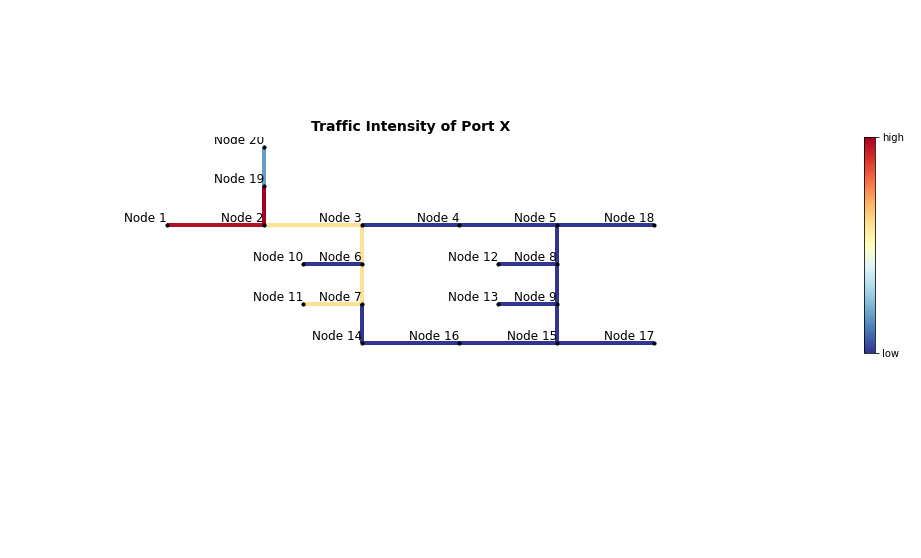

In [18]:
edge_count = np.zeros(len(FG.edges))
for v in vessels:
    df = pd.DataFrame.from_dict(v.log)
    for message in df['Message']:
        if 'Sailing' in message and 'stop' in message:
            r = re.search('Sailing from node (.+?) to node (.+?) stop', message)
            if r:
                node1 = r.group(1)
                node2 = r.group(2)
            for e in enumerate(FG.edges):
                if (node1,node2) == e[1]:
                    edge_count[e[0]] += 1

edge_count_final = np.zeros(len(FG.edges))
for e in enumerate(FG.edges):
    for e2 in enumerate(FG.edges):
        if [e[1][0],e[1][1]] == [e2[1][1],e2[1][0]]:
            edge_count_final[e[0]] = edge_count[e[0]]+edge_count[e2[0]]
            edge_count_final[e2[0]] = edge_count_final[e[0]] 
            break

colormap = cm.get_cmap('RdYlBu_r', 256)
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')
ax = fig.add_axes([0, 0.4, 1, 0.3]);
nx.draw(FG, positions, node_size = 10, node_color ='k', with_labels = True, horizontalalignment = 'right', verticalalignment = 'bottom', edge_color = edge_count_final, edge_cmap = colormap, arrows = False, width= 4)
plt.axis('equal')
cbar = fig.colorbar(cm.ScalarMappable(cmap=colormap), ax=ax, ticks=[0, 1])
cbar.ax.set_yticklabels(['low','high'])  # vertically oriented colorbar
plt.title('Traffic Intensity of Port X',fontsize = 14, fontweight='bold')
plt.show()

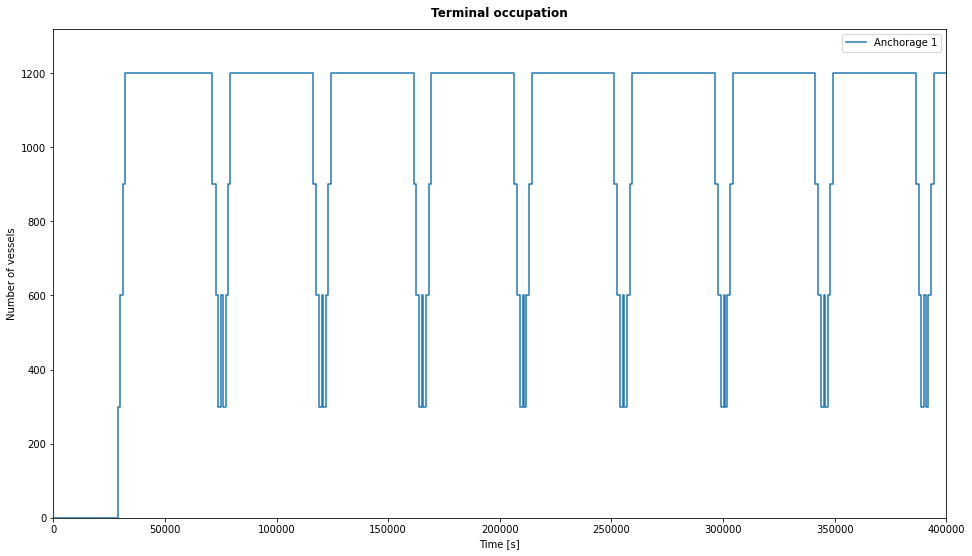

terminal occupancy: 0.915578125


In [19]:
df = pd.DataFrame.from_dict(terminal.log)
df

terminal_edges = [['Node 7','Node 11']]
fig,ax = plt.subplots(figsize=(16, 9))
start = 0
end = duration

for edge in enumerate(terminal_edges):
    terminal = vessels[0].env.FG.edges[edge[1]]['Terminal'][0]
    plt.plot(occupancy_calculation(terminal,duration)[0],occupancy_calculation(terminal,duration)[1])
    if edge[0] == 0:
        ymax = np.max(occupancy_calculation(terminal,duration)[1])
    elif np.max(occupancy_calculation(terminal,duration)[1]) > ymax:
        ymax = np.max(occupancy_calculation(terminal,duration)[1])
    
plt.xlabel('Time [s]')
plt.xlim([start,end])
plt.ylabel('Number of vessels')
plt.ylim([0,math.ceil(1.1*ymax)])
plt.title("Terminal occupation", fontweight='bold', pad = 12)
plt.legend(['Anchorage 1','Anchorage 2'])
plt.show()

delta_time = []
quay_occupation = []
time = []
time.append(simulation_start.timestamp())
if terminal.type == 'quay':
    max_occupation = terminal.length.capacity
elif terminal.type == 'jetty':
    max_occupation = 4
quay_occupation.append(max_occupation)

for t in range(len(terminal.log["Message"])):
    time.append(terminal.log["Timestamp"][t].timestamp())
    delta_time.append(time[t+1]-time[t])
    quay_occupation.append(terminal.log["Value"][t])

delta_time.append(simulation_start.timestamp()+duration-time[t+1])
    
weighted_quay_occupancy = []
for t in range(len(quay_occupation)):
    weighted_quay_occupancy.append(quay_occupation[t]/max_occupation*delta_time[t])
    
    
terminal_occupancy = np.sum(weighted_quay_occupancy)/duration
print('terminal occupancy:',terminal_occupancy)

In [20]:
anchorage = vessels[0].env.FG.nodes['Node 19']['Anchorage'][0]
df = pd.DataFrame.from_dict(anchorage.log)
df

,Message,Timestamp,Value,Geometry
0,Vessel arrival,2021-09-02 19:03:07.000000,1,POINT (0.04491576420597607 0.01808738953497423)
1,Vessel arrival,2021-09-02 20:26:27.000000,2,POINT (0.04491576420597607 0.01808738953497423)
2,Vessel arrival,2021-09-02 21:49:47.000000,3,POINT (0.04491576420597607 0.01808738953497423)
3,Vessel arrival,2021-09-02 23:13:07.000000,4,POINT (0.04491576420597607 0.01808738953497423)
4,Vessel departure,2021-09-03 00:21:32.119879,3,POINT (0.04491576420597607 0.01808738953497423)
...,...,...,...,...
90,Vessel departure,2021-09-07 04:50:17.119881,23,POINT (0.04491576420597607 0.01808738953497423)
91,Vessel departure,2021-09-07 05:12:09.619881,22,POINT (0.04491576420597607 0.01808738953497423)
92,Vessel departure,2021-09-07 05:43:37.119881,21,POINT (0.04491576420597607 0.01808738953497423)
93,Vessel arrival,2021-09-07 05:59:47.000000,22,POINT (0.04491576420597607 0.01808738953497423)


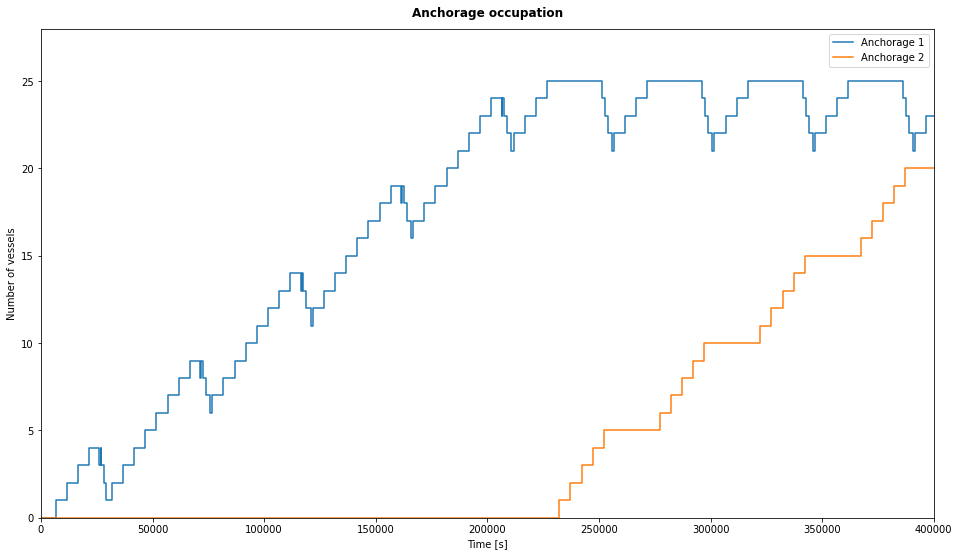

In [21]:
anchorage_nodes = ['Node 19','Node 20']
fig,ax = plt.subplots(figsize=(16, 9))
start = 0
end = duration

for node in enumerate(anchorage_nodes):
    anchorage = vessels[0].env.FG.nodes[node[1]]['Anchorage'][0]
    plt.plot(occupancy_calculation(anchorage,duration)[0],occupancy_calculation(anchorage,duration)[1])
    if node[0] == 0:
        ymax = np.max(occupancy_calculation(anchorage,duration)[1])
    elif np.max(occupancy_calculation(anchorage,duration)[1]) > ymax:
        ymax = np.max(occupancy_calculation(anchorage,duration)[1])
    
plt.xlabel('Time [s]')
plt.xlim([start,end])
plt.ylabel('Number of vessels')
plt.ylim([0,math.ceil(1.1*ymax)])
plt.title("Anchorage occupation", fontweight='bold', pad = 12)
plt.legend(['Anchorage 1','Anchorage 2'])
plt.show()

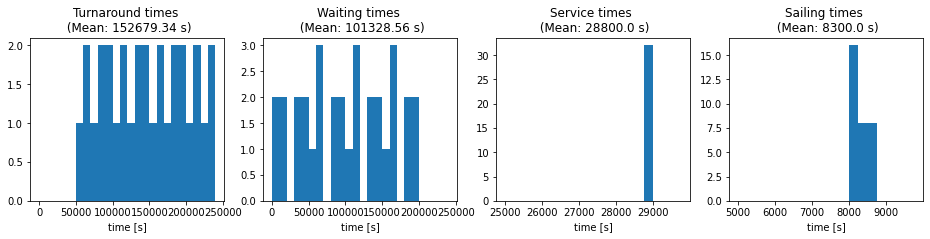

In [22]:
turnaround_times = []
waiting_times = []
sailing_times = []
service_times = []
number_of_vessels_served = 0
for v in range(len(vessels)):
    start_node = []
    end_node = []
    waiting_time = 0
    sailing_time = 0
    for t in range(len(vessels[v].log["Message"])):
        if t == 0:
            turnaround_start = vessels[v].log["Timestamp"][t].timestamp()
            text = vessels[v].log["Message"][t]
            match = re.search('from node (.+?) to', text)
            if match:
                start_node = match.group(1)
        if 'Waiting in anchorage stop' in vessels[v].log["Message"][t]:
            waiting_time = vessels[v].log['Value'][t]
        if 'Sailing from node' in vessels[v].log["Message"][t] and 'stop' in vessels[v].log["Message"][t]:
            sailing_time += vessels[v].log["Timestamp"][t].timestamp()-vessels[v].log["Timestamp"][t-1].timestamp()
        if 'Loading stop' in vessels[v].log["Message"][t]:
            service_time = vessels[v].log["Timestamp"][t].timestamp()-vessels[v].log["Timestamp"][t-3].timestamp()
        if t == len(vessels[v].log["Message"])-1:
            turnaround_end = vessels[v].log["Timestamp"][t].timestamp()
            text = vessels[v].log["Message"][t]
            match = re.search('to node (.+?) stop', text)
            if match:
                end_node = match.group(1)

    if start_node == end_node and end_node != []:
        turnaround_times.append(turnaround_end-turnaround_start)
        waiting_times.append(waiting_time)
        number_of_vessels_served += 1
        sailing_times.append(sailing_time)
        service_times.append(service_time)


fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16, 3))
ax1.hist(turnaround_times, bins=range(0,250000,10000))
ax1.set_title('Turnaround times \n (Mean: '+ str(round(np.mean(turnaround_times),2)) + ' s)')
ax1.set_xlabel('time [s]')

ax2.hist(waiting_times, bins=range(0,250000,10000))
ax2.set_title('Waiting times \n (Mean: '+ str(round(np.mean(waiting_times),2)) + ' s)')
ax2.set_xlabel('time [s]')

ax3.hist(service_times, bins=range(25000,30000,250))
ax3.set_title('Service times \n (Mean: '+ str(round(np.mean(service_times),2)) + ' s)')
ax3.set_xlabel('time [s]')

ax4.hist(sailing_times, bins=range(5000,10000,250))
ax4.set_title('Sailing times \n (Mean: '+ str(round(np.mean(sailing_times),2)) + ' s)')
ax4.set_xlabel('time [s]')
plt.show()

In [23]:
print('The total number of vessels served is',number_of_vessels_served, 'in a time of', duration, 's.')

The total number of vessels served is 32 in a time of 400000 s.


In [24]:
number_of_encounters = 0
for v1 in range(len(vessels)):
    for v2 in range(len(vessels[(v1+1):])):
        v2 = v2+(v1+1)
        for t1 in range(len(vessels[v1].log["Message"])):
            if 'Sailing from node' in vessels[v1].log["Message"][t1] and 'stop' in vessels[v1].log["Message"][t1]:
                text1 = vessels[v1].log["Message"][t1]
                match1 = re.search('from node (.+?) to', text1)
                match2 = re.search('to node (.+?) stop', text1)
                if match1 and match2:
                    node1 = match1.group(1)
                    node2 = match2.group(1)
                    time_start1 = vessels[v1].log["Timestamp"][t1-1].timestamp()
                    time_stop1 = vessels[v1].log["Timestamp"][t1].timestamp()
                    for t2 in range(len(vessels[v2].log["Message"])):
                        if 'Sailing from node' in vessels[v2].log["Message"][t2] and 'stop' in vessels[v2].log["Message"][t2]:
                            time_start2 = vessels[v2].log["Timestamp"][t2-1].timestamp()
                            time_stop2 = vessels[v2].log["Timestamp"][t2].timestamp()
                            text2 = vessels[v2].log["Message"][t2]
                            if (time_start2 <= time_stop1 and time_start2 >= time_start1) or (time_stop2 <= time_stop1 and time_stop2 >= time_start1):
                                if node2 + ' to' in text2 and node1 + ' stop' in text2:
                                    number_of_encounters += 1          

In [25]:
print('The total number of vessel encounters is',number_of_encounters, 'in a time of', duration, 's.')

The total number of vessel encounters is 113 in a time of 400000 s.


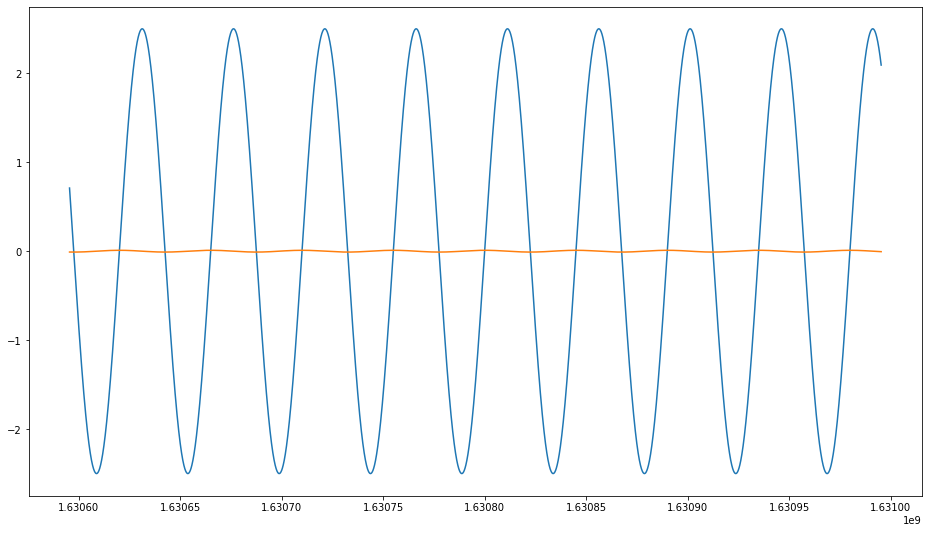

In [26]:
plt.figure(figsize=(16,9))
plt.plot(water_level[1][0][0],water_level[1][0][1])
plt.plot(current_velocity[1][0][0],current_velocity[1][0][1])

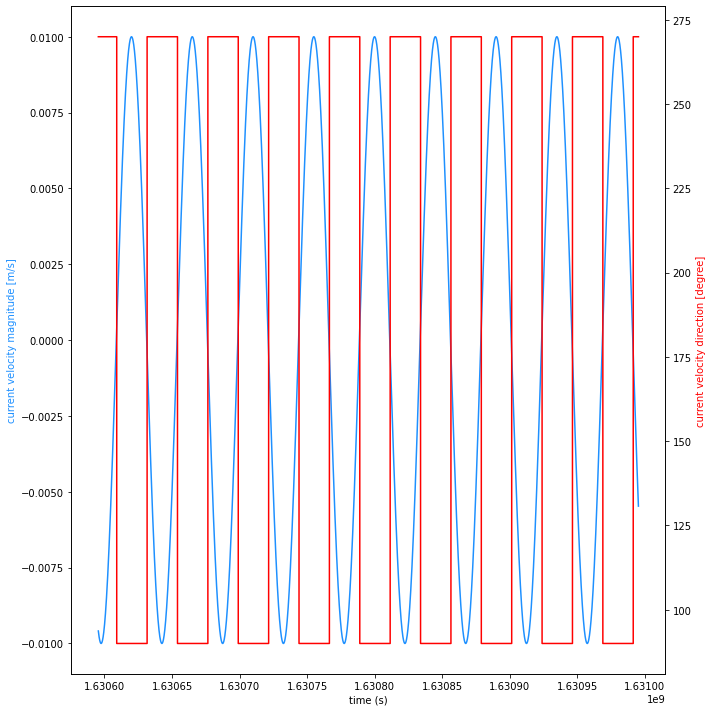

In [27]:
fig, ax1 = plt.subplots(figsize=[10,10])

ax1.plot(current_velocity[1][0][0],current_velocity[1][0][1],color='dodgerblue')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('current velocity magnitude [m/s]',color='dodgerblue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_ylabel('current velocity direction [degree]',color='r')
ax2.plot(current_direction[1][nodes[0]][0],current_direction[1][nodes[0]][1],color='r')
ax2.tick_params(axis='y')

fig.tight_layout() 
plt.show()

In [28]:
vessel = vessels[0]
vessel.route = ['Node 1','Node 2','Node 3','Node 6','Node 7','Node 11']
now = simulation_start.timestamp()
network = vessel.env.FG
route = vessel.route
min_wdep = [[] for _ in range(len(route) - 1)]
new_t = [[] for _ in range(len(route) - 1)]
distance_to_next_node = 0
for nodes in enumerate(route):
    if nodes[1] == route[0]:
        wlev_node = network.edges[route[0], route[1]]['Info']['Water level'][1][0]
        depth = network.edges[route[0], route[1]]['Info']['Depth'][0]
        max_wdep = np.max(wlev_node) + depth
        continue

    distance_to_next_node += pyproj.Geod(ellps='WGS84').inv(network.nodes[route[nodes[0] - 1]]['geometry'].x,
                                                            network.nodes[route[nodes[0] - 1]]['geometry'].y,
                                                            network.nodes[route[nodes[0]]]['geometry'].x,
                                                            network.nodes[route[nodes[0]]]['geometry'].y)[2]

    t_wlev = network.edges[route[nodes[0] - 1], route[nodes[0]]]['Info']['Water level'][0]
    sailing_time_to_next_node = distance_to_next_node / vessel.v
    wlev_node1 = network.edges[route[0], route[1]]['Info']['Water level'][1][0]
    depth1 = network.edges[route[0], route[1]]['Info']['Depth'][0]
    wlev_node2 = network.edges[route[nodes[0] - 1], route[nodes[0]]]['Info']['Water level'][1][1]
    depth2 = network.edges[route[nodes[0] - 1], route[nodes[0]]]['Info']['Depth'][0]
    if np.max([np.max(wlev_node1) + depth1, np.max(wlev_node2) + depth2]) > max_wdep:
        max_wdep = np.max([np.max(wlev_node1)+depth1, np.max(wlev_node2)+depth2])
    interp_wdep_node1 = sc.interpolate.CubicSpline(t_wlev, [y + depth1 for y in wlev_node1])
    eta_next_node = [t - sailing_time_to_next_node for t in t_wlev]
    interp_wdep_node2 = sc.interpolate.CubicSpline(eta_next_node, [y + depth2 for y in wlev_node2])
    if eta_next_node[-1] - now >= 3000:
        new_t[nodes[0] - 1] = np.arange(now, eta_next_node[-1], 300)  # vessel.env.now
    elif eta_next_node[-1] > now:
        new_t[nodes[0] - 1] = np.linspace(now, eta_next_node[-1], 10)  # vessel.env.now
    elif eta_next_node[-1] < now:
        new_t[nodes[0] - 1] = np.linspace(eta_next_node[-1],now, 10)  # vessel.env.now
    else:
        new_t[nodes[0] - 1] = np.arange(eta_next_node[-1],now, 300)  # vessel.env.now
        
    for t in new_t[nodes[0] - 1]:
        min_wdep[nodes[0] - 1].append(np.min([interp_wdep_node1(t), interp_wdep_node2(t)]))

time_minimum_water_depth = []
minimum_water_depth = []
for t in range(len(new_t[nodes[0] - 1])):
    min_water_depth = max_wdep
    for edge in range(len(new_t)):
        if min_wdep[edge][t] < min_water_depth:
            min_water_depth = min_wdep[edge][t]
    time_minimum_water_depth.append(new_t[edge][t])
    minimum_water_depth.append(min_water_depth)

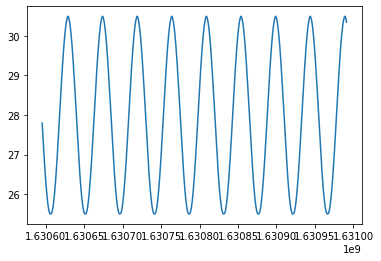

In [29]:
plt.plot(time_minimum_water_depth,minimum_water_depth)

In [30]:
vessel = vessels[0]
network = vessel.env.FG
current_time = vessel.env.now
route = vessel.route
waiting_time = 0
time_edge_is_navigable = 0
now = simulation_start.timestamp()
current_time = now
max_cross_current_velocity = 0.5
for nodes in enumerate(route):
    if nodes[0] == 0:
        continue

    time_current_velocity_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current velocity'][0]
    current_velocity_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current velocity'][1]
    time_current_direction_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current direction'][0]
    current_direction_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current direction'][1]

interp_current_velocity_orig = sc.interpolate.CubicSpline(time_current_velocity_origin, current_velocity_origin)
interp_current_direction_orig = sc.interpolate.interp1d(time_current_direction_origin, current_direction_origin)
root_interp_cross_current_orig = sc.interpolate.CubicSpline(time_current_velocity_origin,
                                                            [y-max_cross_current_velocity for y in abs(interp_current_velocity_orig(time_current_velocity_origin)*np.sin((interp_current_direction_orig(time_current_velocity_origin)-course)/180*math.pi)-
                                                                                                       interp_current_velocity_orig(time_current_velocity_origin)*np.sin((interp_current_direction_orig(time_current_velocity_origin)-heading)/180*math.pi))])

cross_current = abs(interp_current_velocity_orig(current_time)*np.sin((interp_current_direction_orig(current_time)-course)/180*math.pi)-
                    interp_current_velocity_orig(current_time)*np.sin((interp_current_direction_orig(current_time)-heading)/180*math.pi))

if max_cross_current_velocity < cross_current:
    times_edge_is_navigable = root_interp_cross_current_orig.roots()
    for t2 in times_edge_is_navigable:
        if t2 >= current_time:
            time_edge_is_navigable = t2 - current_time
            break

if time_edge_is_navigable > waiting_time:
    waiting_time = time_edge_is_navigable

NameError: name 'course' is not defined

In [ ]:
time_current_velocity_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current velocity'][0]
current_velocity_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current velocity'][1]
time_current_direction_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current direction'][0]
current_direction_origin = network.nodes[vessel.route[nodes[0]-1]]['Info']['Current direction'][1]
time_current_velocity_destination = network.nodes[vessel.route[nodes[0]]]['Info']['Current velocity'][0]
current_velocity_destination = network.nodes[vessel.route[nodes[0]]]['Info']['Current velocity'][1]
time_current_direction_destination = network.nodes[vessel.route[nodes[0]]]['Info']['Current direction'][0]
current_direction_destination = network.nodes[vessel.route[nodes[0]]]['Info']['Current direction'][1]
plt.plot(time_current_velocity_origin,current_velocity_origin)
plt.plot(time_current_velocity_destination,current_velocity_destination)

In [ ]:
plt.plot(time_current_direction_origin,current_direction_origin)
plt.plot(time_current_direction_destination,current_direction_destination)

In [ ]:
time = np.arange(simulation_start.timestamp(),simulation_start.timestamp()+duration,1000)
plt.plot(time,interp_current_velocity_orig(time))

In [ ]:
plt.plot(time,interp_current_direction_orig(time))

In [ ]:
for nodes in enumerate(route):
    if nodes[0] == 0:
        continue
    elif nodes[1] == route[-1]:
        continue
    
    origin_lat = FG.nodes[vessel.route[nodes[0]-1]]['geometry'].x
    origin_lon = FG.nodes[vessel.route[nodes[0]-1]]['geometry'].y
    node_lat = FG.nodes[vessel.route[nodes[0]]]['geometry'].x
    node_lon = FG.nodes[vessel.route[nodes[0]]]['geometry'].y
    destination_lat = FG.nodes[vessel.route[nodes[0]+1]]['geometry'].x
    destination_lon = FG.nodes[vessel.route[nodes[0]+1]]['geometry'].y
    
    course, _, _ = pyproj.Geod(ellps="WGS84").inv(origin_lat, origin_lon,node_lat, node_lon)
    if course < 0:
        course = 360+course
    heading, _, _ = pyproj.Geod(ellps="WGS84").inv(node_lat, node_lon,destination_lat, destination_lon)
    if heading < 0:
        heading = 360+heading
        
    print(nodes[1],heading,course)

In [ ]:
fig, ax1 = plt.subplots(figsize=[10,10])

ax1.plot(root_interp_cross_current_orig.roots(),0.5*np.ones(len(root_interp_cross_current_orig.roots())),'o')
ax1.plot(time,abs(interp_current_velocity_orig(time)*np.sin((interp_current_direction_orig(time)-course)/180*math.pi)-
             interp_current_velocity_orig(time)*np.sin((interp_current_direction_orig(time)-heading)/180*math.pi)))
print(len(root_interp_cross_current_orig.roots()))
ax2 = ax1.twinx()

ax2.plot(time,waiting)

fig.tight_layout() 
#plt.xlim([np.min(water_level[1][0][0]),np.max(water_level[1][0][0])])
ax1.axhline(0.5,color = 'k',linestyle = '--')
plt.show()


In [ ]:
network = vessel.env.FG
#current_time = vessel.env.now
route = vessel.route
waiting_time = 0
time_edge_is_navigable = 0
now = simulation_start.timestamp() #
current_time = now #
max_cross_current_velocity = 0.5
for nodes in enumerate(route):
    if nodes[0] == 0:
        continue
    elif nodes[1] == route[-1]:
        continue

    time_current_velocity_origin = network.nodes[vessel.route[nodes[0]]]['Info']['Current velocity'][0]
    current_velocity_origin = network.nodes[vessel.route[nodes[0]]]['Info']['Current velocity'][1]
    time_current_direction_origin = network.nodes[vessel.route[nodes[0]]]['Info']['Current direction'][0]
    current_direction_origin = network.nodes[vessel.route[nodes[0]]]['Info']['Current direction'][1]

    origin_lat = FG.nodes[vessel.route[nodes[0] - 1]]['geometry'].x
    origin_lon = FG.nodes[vessel.route[nodes[0] - 1]]['geometry'].y
    node_lat = FG.nodes[vessel.route[nodes[0]]]['geometry'].x
    node_lon = FG.nodes[vessel.route[nodes[0]]]['geometry'].y
    destination_lat = FG.nodes[vessel.route[nodes[0] + 1]]['geometry'].x
    destination_lon = FG.nodes[vessel.route[nodes[0] + 1]]['geometry'].y

    course, _, _ = pyproj.Geod(ellps="WGS84").inv(origin_lat, origin_lon, node_lat, node_lon)
    if course < 0:
        course = 360 + course
    heading, _, _ = pyproj.Geod(ellps="WGS84").inv(node_lat, node_lon, destination_lat, destination_lon)
    if heading < 0:
        heading = 360 + heading
        
    distance_to_node = 0
    for n in range(len(route)):
        if n == 0:
            continue
        elif route[n] == nodes[1]:
            break
        distance_to_node += pyproj.Geod(ellps='WGS84').inv(network.nodes[route[n-1]]['geometry'].x,
                                                           network.nodes[route[n-1]]['geometry'].y,
                                                           network.nodes[route[n]]['geometry'].x,
                                                           network.nodes[route[n]]['geometry'].y)[2]
        
    sailing_time = distance_to_node/vessel.v
    interp_current_velocity_orig = sc.interpolate.CubicSpline(time_current_velocity_origin, current_velocity_origin)
    interp_current_direction_orig = sc.interpolate.interp1d(time_current_direction_origin, current_direction_origin)
    root_interp_cross_current_orig = sc.interpolate.CubicSpline([t - sailing_time for t in time_current_velocity_origin],
                                                                [y - max_cross_current_velocity for y in abs(interp_current_velocity_orig(time_current_velocity_origin) * np.sin((interp_current_direction_orig(time_current_velocity_origin) - course) / 180 * math.pi) -
                                                                                                             interp_current_velocity_orig(time_current_velocity_origin) * np.sin((interp_current_direction_orig(time_current_velocity_origin) - heading) / 180 * math.pi))])

    cross_current = abs(interp_current_velocity_orig(current_time+sailing_time) * np.sin((interp_current_direction_orig(current_time+sailing_time) - course) / 180 * math.pi) -
                        interp_current_velocity_orig(current_time+sailing_time) * np.sin((interp_current_direction_orig(current_time+sailing_time) - heading) / 180 * math.pi))

    if max_cross_current_velocity < cross_current:
        times_edge_is_navigable = root_interp_cross_current_orig.roots()
        for t2 in times_edge_is_navigable:
            if t2 >= current_time:
                time_edge_is_navigable = t2 - current_time
                break

    if time_edge_is_navigable > waiting_time:
        waiting_time = time_edge_is_navigable
        
print(times_edge_is_navigable)

In [ ]:
new_t = [t - sailing_time for t in time_current_velocity_origin]
cor_cross_current =  [y - max_cross_current_velocity for y in abs(interp_current_velocity_orig(time_current_velocity_origin) * np.sin((interp_current_direction_orig(time_current_velocity_origin) - course) / 180 * math.pi) -
                                                                  interp_current_velocity_orig(time_current_velocity_origin) * np.sin((interp_current_direction_orig(time_current_velocity_origin) - heading) / 180 * math.pi))]
times_tidal_window = []
for root in root_interp_cross_current_orig.roots():
    if root > np.min(new_t) and root < np.max(new_t) and cor_cross_current[[i for i, x in enumerate(list(new_t > root)) if x][0]] < 0:
        times_tidal_window.append([root, 'Stop'])
    elif root > np.min(new_t) and root < np.max(new_t) and cor_cross_current[[i for i, x in enumerate(list(new_t > root)) if x][0]] > 0:
        times_tidal_window.append([root, 'Start'])

In [ ]:
def minimum_water_per_edge_as_experienced_by_vessel(vessel):
    now = simulation_start.timestamp() #vessel.env.now + delay
    network = vessel.env.FG
    route = vessel.route
    min_wdep = [[] for _ in range(len(route) - 1)]
    new_t = [[] for _ in range(len(route) - 1)]
    distance_to_next_node = 0
    for nodes in enumerate(route):
        if nodes[1] == route[0]:
            wlev_node = network.edges[route[0], route[1]]['Info']['Water level'][1][0]
            depth = network.edges[route[0], route[1]]['Info']['Depth'][0]
            max_wdep = np.max(wlev_node) + depth
            continue

        distance_to_next_node += pyproj.Geod(ellps='WGS84').inv(network.nodes[route[nodes[0] - 1]]['geometry'].x,
                                                                network.nodes[route[nodes[0] - 1]]['geometry'].y,
                                                                network.nodes[route[nodes[0]]]['geometry'].x,
                                                                network.nodes[route[nodes[0]]]['geometry'].y)[2]

        t_wlev = network.edges[route[nodes[0] - 1], route[nodes[0]]]['Info']['Water level'][0]
        sailing_time_to_next_node = distance_to_next_node / vessel.v
        wlev_node1 = network.edges[route[0], route[1]]['Info']['Water level'][1][0]
        depth1 = network.edges[route[0], route[1]]['Info']['Depth'][0]
        wlev_node2 = network.edges[route[nodes[0] - 1], route[nodes[0]]]['Info']['Water level'][1][1]
        depth2 = network.edges[route[nodes[0] - 1], route[nodes[0]]]['Info']['Depth'][0]
        if np.max([np.max(wlev_node1) + depth1, np.max(wlev_node2) + depth2]) > max_wdep:
            max_wdep = np.max([np.max(wlev_node1)+depth1, np.max(wlev_node2)+depth2])
        interp_wdep_node1 = sc.interpolate.CubicSpline(t_wlev, [y + depth1 for y in wlev_node1])
        eta_next_node = [t - sailing_time_to_next_node for t in t_wlev]
        interp_wdep_node2 = sc.interpolate.CubicSpline(eta_next_node, [y + depth2 for y in wlev_node2])
        if eta_next_node[-1] - now >= 3000:
            new_t[nodes[0] - 1] = np.arange(now, eta_next_node[-1], 300)  # vessel.env.now
        elif eta_next_node[-1] > now:
            new_t[nodes[0] - 1] = np.linspace(now, eta_next_node[-1], 10)  # vessel.env.now
        elif eta_next_node[-1] < now:
            new_t[nodes[0] - 1] = np.linspace(eta_next_node[-1],now, 10)  # vessel.env.now
        else:
            new_t[nodes[0] - 1] = np.arange(eta_next_node[-1],now, 300)  # vessel.env.now
        for t in new_t[nodes[0] - 1]:
            min_wdep[nodes[0] - 1].append(np.min([interp_wdep_node1(t), interp_wdep_node2(t)]))

    time_minimum_water_depth = []
    minimum_water_depth = []
    for t in range(len(new_t[nodes[0] - 1])):
        min_water_depth = max_wdep
        for edge in range(len(new_t)):
            if min_wdep[edge][t] < min_water_depth:
                min_water_depth = min_wdep[edge][t]
        time_minimum_water_depth.append(new_t[edge][t])
        minimum_water_depth.append(min_water_depth)

    return time_minimum_water_depth, minimum_water_depth

def waiting_time_for_vertical_tidal_window(vessel,delay = 0):
    network = vessel.env.FG
    current_time = simulation_start.timestamp() #vessel.env.now + delay
    route = vessel.route
    waiting_time = 0
    time_edge_is_navigable = 0
    times_hor_tidal_window = []
    time_minimum_water_depth, minimum_water_depth = minimum_water_per_edge_as_experienced_by_vessel(vessel)
    water_depth_required = vessel.T_f + vessel.ukc
    interp_water_level_at_edge = sc.interpolate.CubicSpline(time_minimum_water_depth, minimum_water_depth)
    corrected_water_level = [y - water_depth_required for y in minimum_water_depth]
    root_interp_water_level_at_edge = sc.interpolate.CubicSpline(time_minimum_water_depth,corrected_water_level)
    water_depth_at_edge = interp_water_level_at_edge(current_time)
    if water_depth_required > water_depth_at_edge:
        times_edge_is_navigable = root_interp_water_level_at_edge.roots()
        for root in times_edge_is_navigable:
            if root > np.min(time_minimum_water_depth) and root < np.max(time_minimum_water_depth) and corrected_water_level[[i for i, x in enumerate(list(time_minimum_water_depth > root)) if x][0]] < 0:
                times_hor_tidal_window.append([root, 'Stop'])
            elif root > np.min(time_minimum_water_depth) and root < np.max(time_minimum_water_depth) and corrected_water_level[[i for i, x in enumerate(list(time_minimum_water_depth > root)) if x][0]] > 0:
                times_hor_tidal_window.append([root, 'Start'])

        for t2 in times_edge_is_navigable:
            if t2 >= current_time:
                time_edge_is_navigable = t2 - current_time
                break

    if time_edge_is_navigable > waiting_time:
        waiting_time = time_edge_is_navigable

    return times_hor_tidal_window,root_interp_water_level_at_edge

def calculate_available_sail_in_times(vessel):
    available_sail_in_times = []
    vessel.waiting_time_start = vessel.env.now
    vessel.max_waiting_time = vessel.waiting_time_start + 24 * 60 * 60
    [new_t,min_wdep] = minimum_water_per_edge_as_experienced_by_vessel(vessel)

    def times_tidal_window(vessel,new_t,min_wdep):
        root_interp_water_level_at_edge = waiting_time_for_vertical_tidal_window(vessel)[1]
        water_depth_required = vessel.T_f + vessel.ukc
        
        times_tidal_window = []
        for root in root_interp_water_level_at_edge.roots():
            if root > np.min(new_t) and root < np.max(new_t) and min_wdep[[i for i, x in enumerate(list(new_t > root)) if x][0]] > water_depth_required:
                times_tidal_window.append([root, 'Stop'])
            elif root > np.min(new_t) and root < np.max(new_t) and min_wdep[[i for i, x in enumerate(list(new_t > root)) if x][0]] < water_depth_required:
                times_tidal_window.append([root, 'Start'])

        return times_tidal_window

    def max_waiting_time_in_anchorage(vessel, times_tidal_window):
        for time in range(len(times_tidal_window)):
            if times_tidal_window[time][0] > vessel.max_waiting_time and times_tidal_window[time][1] == 'Stop':
                break
        if not times_tidal_window or times_tidal_window[time - 1][0] > vessel.max_waiting_time:
            max_waiting_time_in_anchorage = vessel.max_waiting_time
        else:
            max_waiting_time_in_anchorage = times_tidal_window[time - 1][0]
        return max_waiting_time_in_anchorage

    times_tidal_window = times_tidal_window(vessel,new_t,min_wdep)
    for time in range(len(times_tidal_window)):
        if times_tidal_window[time][0] < max_waiting_time_in_anchorage(vessel, times_tidal_window):
            available_sail_in_times.append(times_tidal_window[time])

    #available_sail_in_times.insert(0, [vessel.waiting_time_start, 'Start'])
    available_sail_in_times.append([max_waiting_time_in_anchorage(vessel, times_tidal_window), 'Stop'])
    return available_sail_in_times

In [ ]:
calculate_available_sail_in_times(vessel)

In [ ]:
times_tidal_window

In [ ]:
a = calculate_available_sail_in_times(vessel)
b = []
for i in times_tidal_window:
    b.append(i)

c = []
d = []
e = []
f = 0
g = []

for i in range(len(a)):
    if i == 0:
        continue
    
    if a[i][1] == 'Stop' and a[i-1][1] == 'Start':
        for j in range(len(b)):
            if a[i][0] >= b[j][0] and a[i-1][0] <= b[j][0]:
                e.append(j)
            elif b[j][0] > a[i][0]:
                break

for i in list(reversed(e)):
    b.pop(i)
    
for i in b:
    a.append(i)
    
for i in range(len(a)):
    c.append(a[i][0])
    d.append(a[i][1])
    
f = sorted(zip(c,d))

for i in range(len(f)):
    if i == 0:
        continue
    
    if f[i][1] == 'Start' and f[i-1][1] == 'Start':
        g.append(i)
    elif f[i][1] == 'Stop' and f[i-1][1] == 'Stop':
        g.append(i-1)
        
for i in list(reversed(g)):
    f.pop(i)    
    
f

In [ ]:
plt.plot([x[0] for i,x in enumerate(calculate_available_sail_in_times(vessel))],0.6*np.ones(len(calculate_available_sail_in_times(vessel))),'o')
plt.plot([x[0] for i,x in enumerate(times_tidal_window)],0.4*np.ones(len(times_tidal_window)),'o')
plt.ylim([0.3,0.7])
plt.xlim([simulation_start.timestamp(),simulation_start.timestamp()+1/2*duration])
plt.plot([x[0] for i,x in enumerate(f)],0.5*np.ones(len(f)),'o')